In [1]:
from getpass import getpass

In [2]:
from mattermostdriver import Driver

foo = Driver({'url': 'cctb-intern.biologie.uni-wuerzburg.de', 'token': getpass("Token: "), 'port': 443})

In [3]:

"""
Most of the requests need you to be logged in, so calling login()
should be the first thing you do after you created your Driver instance.
login() returns the raw response.
If using a personal access token, you still need to run login().
In this case, does not make a login request, but a `get_user('me')`
and sets everything up in the client.
"""
foo.login()


{'id': '8gtq7te3ii8k3dat8gougi6ikh',
 'create_at': 1498818560044,
 'update_at': 1725349126720,
 'delete_at': 0,
 'username': 'iimog',
 'auth_data': '',
 'auth_service': '',
 'email': 'markus.ankenbrand@uni-wuerzburg.de',
 'email_verified': True,
 'nickname': '',
 'first_name': 'Markus',
 'last_name': 'Ankenbrand',
 'position': '',
 'roles': 'system_user',
 'allow_marketing': True,
 'props': {'customStatus': '{"emoji":"palm_tree","text":"On a vacation","duration":"date_and_time","expires_at":"2024-08-25T17:30:00Z"}',
  'last_search_pointer': '2'},
 'notify_props': {'channel': 'true',
  'comments': 'never',
  'desktop': 'all',
  'desktop_duration': '5',
  'desktop_sound': 'true',
  'email': 'false',
  'first_name': 'false',
  'mention_keys': 'iimog',
  'push': 'mention',
  'push_status': 'online',
  'user_id': '8gtq7te3ii8k3dat8gougi6ikh'},
 'last_password_update': 1499240959099,
 'last_picture_update': 1499243140269,
 'locale': 'en',
 'timezone': {'automaticTimezone': 'Europe/Berlin',
 

In [4]:
team = foo.teams.get_team_by_name('CCTB')

In [5]:
lunch = foo.channels.get_channel_by_name(channel_name='lunch', team_id=team['id'])
lunch

{'id': 'h3azbb4yejd69kg68kdmqiw53r',
 'create_at': 1499152209696,
 'update_at': 1689242463847,
 'delete_at': 0,
 'team_id': '4izweae3eigapetc3b4stqkgna',
 'type': 'O',
 'display_name': 'lunch',
 'name': 'lunch',
 'header': '[cooking](https://hackmd.io/PhOpF6VoQN2D9Mg6R3K9bQ?view) - [gather](https://gather.town/app/r4oLVM25VSqeXimY/CCTB)',
 'purpose': 'How to organize lunch :)',
 'last_post_at': 1725354022944,
 'total_msg_count': 6959,
 'extra_update_at': 1533632808244,
 'creator_id': '',
 'scheme_id': None,
 'props': None,
 'group_constrained': None,
 'shared': None,
 'total_msg_count_root': 7024,
 'policy_id': None,
 'last_root_post_at': 1725354022944}

In [6]:
import pandas as pd

In [7]:
lunch_users = pd.DataFrame(foo.channels.get_channel_members(channel_id=lunch['id']))

In [8]:
lunch_users.head()

,channel_id,user_id,roles,last_viewed_at,msg_count,mention_count,mention_count_root,urgent_mention_count,msg_count_root,notify_props,last_update_at,scheme_guest,scheme_user,scheme_admin,explicit_roles
0,h3azbb4yejd69kg68kdmqiw53r,sgo45qg6mtdpbr7myj1r9cfi1r,channel_user,1724922401125,6956,0,0,0,7021,"{'channel_auto_follow_threads': 'off', 'deskto...",1724922401125,False,True,False,
1,h3azbb4yejd69kg68kdmqiw53r,tx1yzeb9nt8nfxdhwubpg8r5jo,channel_user,0,0,1,0,0,0,"{'desktop': 'default', 'email': 'default', 'ma...",1500541982832,False,True,False,
2,h3azbb4yejd69kg68kdmqiw53r,gfi8bmr7s7ngxmiaoky85kq4mr,channel_user,1725267662743,6958,0,0,0,7023,"{'channel_auto_follow_threads': 'off', 'deskto...",1725267662743,False,True,False,
3,h3azbb4yejd69kg68kdmqiw53r,kdgn564aftdt5bysbi1qzfrjfa,channel_user,1722333245221,6928,0,0,0,6993,"{'desktop': 'default', 'email': 'default', 'ma...",1722333245221,False,True,False,
4,h3azbb4yejd69kg68kdmqiw53r,ddfs5ytccpbmu8irhc1izy5thh,channel_user,1715762282102,6873,1,1,0,6939,"{'channel_auto_follow_threads': 'off', 'deskto...",1722333245346,False,True,False,


In [9]:
lunch_users.shape

(35, 15)

<AxesSubplot: xlabel='user_id'>

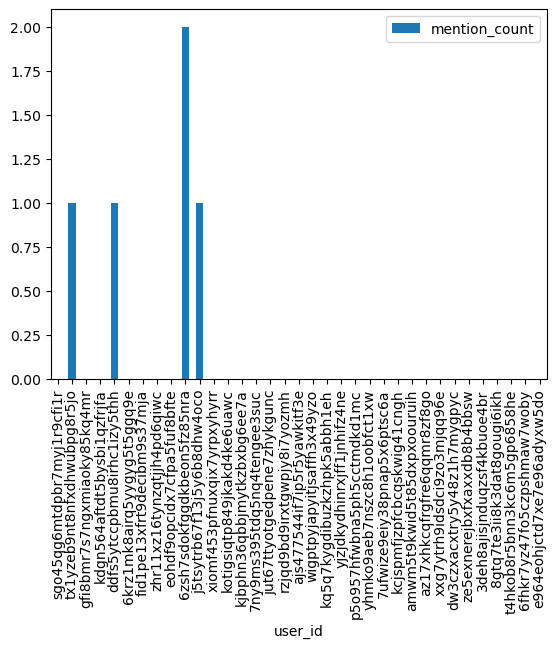

In [10]:
lunch_users.plot(kind='bar', x='user_id', y='mention_count')

In [11]:
foo.users.get_stats()

{'total_users_count': 443}

In [12]:
users = pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 0}))
users = pd.concat([users, pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 1}))])
users = pd.concat([users, pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 2}))])
users = pd.concat([users, pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 3}))])
users.drop(columns=['email'], inplace=True)

In [13]:
users.shape

(452, 20)

In [14]:
users = users.sort_values('create_at')

In [15]:
users.position.value_counts()

                               442
top floor, left                  1
IT Admin                         1
Bachelor Student                 1
Student                          1
Associate professor              1
PhD student                      1
Master Student @ AG Beliu        1
Master Student                   1
visitor                          1
some random biology student      1
Name: position, dtype: int64

In [16]:
foo.channels.get_channel_statistics(channel_id=lunch['id'])

{'channel_id': 'h3azbb4yejd69kg68kdmqiw53r',
 'member_count': 34,
 'guest_count': 0,
 'pinnedpost_count': 0,
 'files_count': 217}

In [17]:
lunch['total_msg_count']

6959

In [18]:
posts = foo.posts.get_posts_for_channel(channel_id=lunch['id'])

In [19]:
list(posts['posts'].values())[1]['metadata']['reactions']

[{'user_id': 't4hkob8r5bnn3kc6m5gp6858he',
  'post_id': '3krp8is4ob8axp5cr4115on59w',
  'emoji_name': 'pizza',
  'create_at': 1722328778525,
  'update_at': 1722328778525,
  'delete_at': 0,
  'remote_id': '',
  'channel_id': 'h3azbb4yejd69kg68kdmqiw53r'}]

In [20]:
#list(posts['posts'].values())[1]['metadata']['files'][0]

In [21]:
file = foo.files.get_file_preview(file_id='mqs611s1jfng7ywfhgewadedsy')

In [22]:
import base64
from PIL import Image
from io import BytesIO

In [23]:
def base64_to_image(base64_string):
    # Remove the data URI prefix if present
    if "data:image" in base64_string:
        base64_string = base64_string.split(",")[1]

    # Decode the Base64 string into bytes
    image_bytes = base64.b64decode(base64_string)
    return image_bytes

In [24]:
def create_image_from_bytes(image_bytes):
    # Create a BytesIO object to handle the image data
    image_stream = BytesIO(image_bytes)

    # Open the image using Pillow (PIL)
    image = Image.open(image_stream)
    return image

In [25]:
def show_image_from_file_id(file_id):
    file = foo.files.get_file_preview(file_id=file_id)
    image = create_image_from_bytes(file.content)
    return image

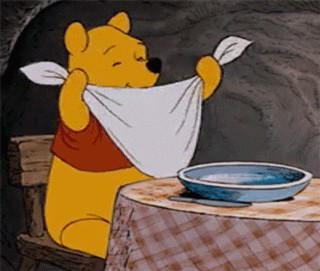

In [26]:
create_image_from_bytes(file.content)

In [27]:
#img_preview_b64 = list(posts['posts'].values())[1]['metadata']['files'][0]['mini_preview']

In [28]:
#create_image_from_bytes(base64_to_image(img_preview_b64))

In [29]:
lunch_posts = []
for i in range(lunch['total_msg_count'] // 200 + 2):
    lunch_posts.append(foo.posts.get_posts_for_channel(channel_id=lunch['id'], params={'per_page': 200, 'page': i}))

In [30]:
[len(x['posts']) for x in lunch_posts]

[200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 201,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 106]

In [31]:
lunch_posts_list = sum([list(x['posts'].values()) for x in lunch_posts], [])

In [32]:
len(lunch_posts_list)

7107

In [33]:
lp = pd.DataFrame(lunch_posts_list)
lp = lp.sort_values(by="create_at")
lp.head()

,id,create_at,update_at,edit_at,delete_at,is_pinned,user_id,channel_id,root_id,original_id,...,props,hashtags,pending_post_id,reply_count,last_reply_at,participants,metadata,file_ids,has_reactions,remote_id
7055,kjy1uptj8jym7fzsr71qkd9y7c,1462183322000,1462183322000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,{},,,0,0,None,{},NaN,NaN,NaN
7017,8nub7or8zfbkmpipx646q9rr9a,1462183322000,1462183322000,0,0,False,8gtq7te3ii8k3dat8gougi6ikh,h3azbb4yejd69kg68kdmqiw53r,,,...,{'username': 'iimog'},,,0,0,None,{},NaN,NaN,NaN
7016,8kbk3re5sjroi8bfnxai3m7s3o,1462183322000,1462183322000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,{'username': 'greatfireball'},,,0,0,None,{},NaN,NaN,NaN
7009,644cyj77kinubm5guf5wacwphe,1462183323000,1462183323000,0,0,False,zhcza6utdjbddq3tkcr9pwhunc,h3azbb4yejd69kg68kdmqiw53r,,,...,{'username': 'nterhoeven'},,,0,0,None,{},NaN,NaN,NaN
7041,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,1462183333000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,{},,,0,0,None,{},NaN,NaN,NaN


In [72]:
lp.to_pickle("messages_df_raw.pkl")

In [34]:
lp.type.value_counts()

                         6934
system_join_channel       113
system_leave_channel       29
system_add_to_channel      27
system_header_change        3
system_purpose_change       1
Name: type, dtype: int64

In [35]:
lp.metadata[1]

{'files': [{'id': 'mqs611s1jfng7ywfhgewadedsy',
   'user_id': 'yhmko9aeb7nszc8h1oobfct1xw',
   'post_id': '1f77hkb68py5ukuzfdcw1j8mty',
   'channel_id': 'h3azbb4yejd69kg68kdmqiw53r',
   'create_at': 1715935775896,
   'update_at': 1715935775896,
   'delete_at': 0,
   'name': 'Lunch Winnie Pooh.gif',
   'extension': 'gif',
   'size': 917786,
   'mime_type': 'image/gif',
   'width': 320,
   'height': 271,
   'mini_preview': '/9j/2wCEAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRQBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/AABEIABAAEAMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEy

In [36]:
lp.columns

Index(['id', 'create_at', 'update_at', 'edit_at', 'delete_at', 'is_pinned',
       'user_id', 'channel_id', 'root_id', 'original_id', 'message', 'type',
       'props', 'hashtags', 'pending_post_id', 'reply_count', 'last_reply_at',
       'participants', 'metadata', 'file_ids', 'has_reactions', 'remote_id'],
      dtype='object')

In [37]:
lp[lp.type == ""].remote_id.value_counts()

    51
Name: remote_id, dtype: int64

In [38]:
lunch_messages = lp[lp.type == ""][["id", "create_at", "user_id", "message", "metadata", "file_ids"]]
lunch_messages

,id,create_at,user_id,message,metadata,file_ids
7041,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,xuzzcgkghb8nzj45w3q4mmuohe,Also ich habe etwas dabei,{},NaN
7074,rpwuii8hci8ezmn3d41u9d58fc,1462183382000,zhcza6utdjbddq3tkcr9pwhunc,ich gehe mir jetzt was holen,{},NaN
7032,e8bnwq8c7fdf5k7zpqyeihougr,1462183404000,xuzzcgkghb8nzj45w3q4mmuohe,Alles klar,{},NaN
7078,sku34dhpntdfdmc5d9ky9a9yso,1462184433000,xuzzcgkghb8nzj45w3q4mmuohe,Hallo @joerg,{},NaN
7043,hi38ssjpb3yqz88dk83tzjq5zr,1462184435000,xuzzcgkghb8nzj45w3q4mmuohe,Essen?,{},NaN
...,...,...,...,...,...,...
64,bztf3jo6q3rqbkpmabmbonhfde,1724922325020,t4hkob8r5bnn3kc6m5gp6858he,when?,{},NaN
144,pzcs4g7f3pgi7g35d6f4hwnp7w,1724922401125,az17xhkcqfrgfre6qqmr8zf8go,11:15?,{'reactions': [{'user_id': 't4hkob8r5bnn3kc6m5...,NaN
67,d3dxbcsmyi8i7rae83hn6m6aue,1725008992213,t4hkob8r5bnn3kc6m5gp6858he,lunch 11:15?,{'reactions': [{'user_id': 'az17xhkcqfrgfre6qq...,NaN
91,gnamzgc7gprzzch6kpio9emwjy,1725267662743,t4hkob8r5bnn3kc6m5gp6858he,11:15?,{'emojis': [{'id': 'c3d7p7oa5tyfzx89z481ph9ico...,[pny95the7pfrb8uahkddsdrbir]


In [39]:
lm = lunch_messages.merge(users[["id", "username"]].rename(columns={"id": "user_id"}), how='left', on='user_id').drop(columns='user_id')
lm

,id,create_at,message,metadata,file_ids,username
0,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,Also ich habe etwas dabei,{},NaN,greatfireball
1,rpwuii8hci8ezmn3d41u9d58fc,1462183382000,ich gehe mir jetzt was holen,{},NaN,nterhoeven
2,e8bnwq8c7fdf5k7zpqyeihougr,1462183404000,Alles klar,{},NaN,greatfireball
3,sku34dhpntdfdmc5d9ky9a9yso,1462184433000,Hallo @joerg,{},NaN,greatfireball
4,hi38ssjpb3yqz88dk83tzjq5zr,1462184435000,Essen?,{},NaN,greatfireball
...,...,...,...,...,...,...
6929,bztf3jo6q3rqbkpmabmbonhfde,1724922325020,when?,{},NaN,felixfink
6930,pzcs4g7f3pgi7g35d6f4hwnp7w,1724922401125,11:15?,{'reactions': [{'user_id': 't4hkob8r5bnn3kc6m5...,NaN,sascha_ollertz
6931,d3dxbcsmyi8i7rae83hn6m6aue,1725008992213,lunch 11:15?,{'reactions': [{'user_id': 'az17xhkcqfrgfre6qq...,NaN,felixfink
6932,gnamzgc7gprzzch6kpio9emwjy,1725267662743,11:15?,{'emojis': [{'id': 'c3d7p7oa5tyfzx89z481ph9ico...,[pny95the7pfrb8uahkddsdrbir],felixfink


In [40]:
users.to_csv('users.csv', index=False)

In [41]:
lm["num_reactions"] = lm.metadata.apply(lambda x: len(x.get('reactions', [])))
lm["num_files"] = lm.metadata.apply(lambda x: len(x.get('files', [])))

In [42]:
lm

,id,create_at,message,metadata,file_ids,username,num_reactions,num_files
0,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,Also ich habe etwas dabei,{},NaN,greatfireball,0,0
1,rpwuii8hci8ezmn3d41u9d58fc,1462183382000,ich gehe mir jetzt was holen,{},NaN,nterhoeven,0,0
2,e8bnwq8c7fdf5k7zpqyeihougr,1462183404000,Alles klar,{},NaN,greatfireball,0,0
3,sku34dhpntdfdmc5d9ky9a9yso,1462184433000,Hallo @joerg,{},NaN,greatfireball,0,0
4,hi38ssjpb3yqz88dk83tzjq5zr,1462184435000,Essen?,{},NaN,greatfireball,0,0
...,...,...,...,...,...,...,...,...
6929,bztf3jo6q3rqbkpmabmbonhfde,1724922325020,when?,{},NaN,felixfink,0,0
6930,pzcs4g7f3pgi7g35d6f4hwnp7w,1724922401125,11:15?,{'reactions': [{'user_id': 't4hkob8r5bnn3kc6m5...,NaN,sascha_ollertz,2,0
6931,d3dxbcsmyi8i7rae83hn6m6aue,1725008992213,lunch 11:15?,{'reactions': [{'user_id': 'az17xhkcqfrgfre6qq...,NaN,felixfink,2,0
6932,gnamzgc7gprzzch6kpio9emwjy,1725267662743,11:15?,{'emojis': [{'id': 'c3d7p7oa5tyfzx89z481ph9ico...,[pny95the7pfrb8uahkddsdrbir],felixfink,5,1


In [43]:
lm.num_reactions.sum()

3611

In [44]:
lm.num_reactions.value_counts()

0     5538
1      464
2      351
3      236
4      157
5       97
6       53
7       24
9        5
8        4
15       1
10       1
12       1
11       1
13       1
Name: num_reactions, dtype: int64

In [45]:
reactions = pd.DataFrame(lm.metadata.apply(lambda x: x.get('reactions', [])).explode().dropna().tolist())[["user_id", "post_id", "create_at", "emoji_name"]].merge(users[["id", "username"]].rename(columns={"id": "user_id"}), how='left', on='user_id').drop(columns='user_id')

In [46]:
reactions.username.value_counts()

simon.schardt    322
andreaskuhn      249
robinroelz       223
kerstin          208
iimog            206
                ... 
masebo             1
vanessa            1
gosia              1
hannananna         1
biertee            1
Name: username, Length: 80, dtype: int64

In [47]:
reactions.emoji_name.value_counts()

+1                    1231
hamburger              111
joy                     82
point_up                70
ok_hand                 62
                      ... 
sos                      1
computer                 1
woman_technologist       1
alien                    1
footprints               1
Name: emoji_name, Length: 359, dtype: int64

In [48]:
import emoji

In [49]:
reactions["emoji"] = reactions.emoji_name.apply(lambda x: emoji.emojize(f":{x}:", language="alias"))

In [50]:
reactions.emoji.value_counts()

👍      1231
🍔       111
😂        82
☝️       70
👌        62
       ... 
🆘         1
💻         1
👩‍💻       1
👽         1
👣         1
Name: emoji, Length: 357, dtype: int64

In [51]:
reactions

,post_id,create_at,emoji_name,username,emoji
0,ng3m9o5c5igw3gpgg1dqmgs4mw,1503050243978,+1,lulei,👍
1,atnyf76f1tb1fmznhrk4s3wohr,1503309004166,+1,sonja,👍
2,atnyf76f1tb1fmznhrk4s3wohr,1503309142457,+1,iimog,👍
3,eh5ge6nnf7np5q61rqpfwhmqaw,1503480285263,+1,sonja,👍
4,eh5ge6nnf7np5q61rqpfwhmqaw,1503480404383,+1,alexanderkeller,👍
...,...,...,...,...,...
3606,mputf8b3mpygu8td7hr9nmnw3r,1725354336767,gopnik,felixfink,:gopnik:
3607,mputf8b3mpygu8td7hr9nmnw3r,1725354413568,pizza,sascha_ollertz,🍕
3608,mputf8b3mpygu8td7hr9nmnw3r,1725354469163,man-gesturing-ok,mike_k,:man-gesturing-ok:
3609,mputf8b3mpygu8td7hr9nmnw3r,1725354553057,gopnik,david,:gopnik:


In [52]:
import datetime
import pytz
tz = pytz.timezone("Europe/Berlin")

In [53]:
print(datetime.datetime.fromtimestamp(lm.create_at[201]/1000), tz)

2016-06-02 11:59:49 Europe/Berlin


In [54]:
import numpy as np

In [55]:
if type(reactions.create_at[0]) == np.int64:
  reactions.create_at = reactions.create_at.apply(lambda x: datetime.datetime.fromtimestamp(x/1000), tz)

In [56]:
reactions

,post_id,create_at,emoji_name,username,emoji
0,ng3m9o5c5igw3gpgg1dqmgs4mw,2017-08-18 11:57:23.978,+1,lulei,👍
1,atnyf76f1tb1fmznhrk4s3wohr,2017-08-21 11:50:04.166,+1,sonja,👍
2,atnyf76f1tb1fmznhrk4s3wohr,2017-08-21 11:52:22.457,+1,iimog,👍
3,eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:24:45.263,+1,sonja,👍
4,eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:26:44.383,+1,alexanderkeller,👍
...,...,...,...,...,...
3606,mputf8b3mpygu8td7hr9nmnw3r,2024-09-03 11:05:36.767,gopnik,felixfink,:gopnik:
3607,mputf8b3mpygu8td7hr9nmnw3r,2024-09-03 11:06:53.568,pizza,sascha_ollertz,🍕
3608,mputf8b3mpygu8td7hr9nmnw3r,2024-09-03 11:07:49.163,man-gesturing-ok,mike_k,:man-gesturing-ok:
3609,mputf8b3mpygu8td7hr9nmnw3r,2024-09-03 11:09:13.057,gopnik,david,:gopnik:


In [57]:
reactions.to_csv("reactions.csv", index=False)

In [58]:
files = lm[["id", "file_ids"]].explode('file_ids').dropna()

In [59]:
lm = lm.drop(["metadata","file_ids"], axis=1).rename(columns={'id': 'post_id'})

In [60]:
if type(lm.create_at[0]) == np.int64:
  lm.create_at = lm.create_at.apply(lambda x: datetime.datetime.fromtimestamp(x/1000), tz)

In [61]:
lm

,post_id,create_at,message,username,num_reactions,num_files
0,h957oi1t63rf5b6p4pqfhiis5h,2016-05-02 12:02:13.000,Also ich habe etwas dabei,greatfireball,0,0
1,rpwuii8hci8ezmn3d41u9d58fc,2016-05-02 12:03:02.000,ich gehe mir jetzt was holen,nterhoeven,0,0
2,e8bnwq8c7fdf5k7zpqyeihougr,2016-05-02 12:03:24.000,Alles klar,greatfireball,0,0
3,sku34dhpntdfdmc5d9ky9a9yso,2016-05-02 12:20:33.000,Hallo @joerg,greatfireball,0,0
4,hi38ssjpb3yqz88dk83tzjq5zr,2016-05-02 12:20:35.000,Essen?,greatfireball,0,0
...,...,...,...,...,...,...
6929,bztf3jo6q3rqbkpmabmbonhfde,2024-08-29 11:05:25.020,when?,felixfink,0,0
6930,pzcs4g7f3pgi7g35d6f4hwnp7w,2024-08-29 11:06:41.125,11:15?,sascha_ollertz,2,0
6931,d3dxbcsmyi8i7rae83hn6m6aue,2024-08-30 11:09:52.213,lunch 11:15?,felixfink,2,0
6932,gnamzgc7gprzzch6kpio9emwjy,2024-09-02 11:01:02.743,11:15?,felixfink,5,1


In [62]:
lm.to_csv("messages.csv", index=False)

In [63]:
print(f"https://cctb-intern.biologie.uni-wuerzburg.de/api/v4/files/{files.file_ids.iloc[17]}/preview")

https://cctb-intern.biologie.uni-wuerzburg.de/api/v4/files/ekw6xcaibp8j7n599ycwsmfmxh/preview


In [64]:
files["link"] = files.file_ids.apply(lambda x: f"https://cctb-intern.biologie.uni-wuerzburg.de/api/v4/files/{x}/preview")

In [65]:
files = files.rename(columns={'id': 'post_id', 'file_ids': 'file_id'})
files

,post_id,file_id,link
2439,om9ew7kt8jb67kdfpccxghhi6w,pj8qc7ou7jykpmjufpdajw1c7c,https://cctb-intern.biologie.uni-wuerzburg.de/...
3057,gphsf7myujyttrkp8h1m88a1oe,dw7wgdga9ibpdxb4oqu6n7hszy,https://cctb-intern.biologie.uni-wuerzburg.de/...
3057,gphsf7myujyttrkp8h1m88a1oe,na9j4ujj8fgmjrxaf3xguuitbo,https://cctb-intern.biologie.uni-wuerzburg.de/...
3219,s9to6m6k47nbxq6o9qcjw6g8ke,rbhd48d9qt8ejpd6zko3wpyn5r,https://cctb-intern.biologie.uni-wuerzburg.de/...
3219,s9to6m6k47nbxq6o9qcjw6g8ke,13wiiwwk8bbniqthcpjkr6bqsw,https://cctb-intern.biologie.uni-wuerzburg.de/...
...,...,...,...
6921,nejc3nh1offzdp7bmgpnqe8ekr,qibqn97p7indj8kaaf99138t5e,https://cctb-intern.biologie.uni-wuerzburg.de/...
6923,bbfpcxrnq3g7fq95ftjor4f3ge,dtomhxxczibpjgze7eyd1ie3hc,https://cctb-intern.biologie.uni-wuerzburg.de/...
6924,3mkddbhfftbmjecwinq7nuy6zw,7hr6w6dkf3n3iy1nganjg71dda,https://cctb-intern.biologie.uni-wuerzburg.de/...
6932,gnamzgc7gprzzch6kpio9emwjy,pny95the7pfrb8uahkddsdrbir,https://cctb-intern.biologie.uni-wuerzburg.de/...


In [66]:
files.to_csv("files.csv", index=False)

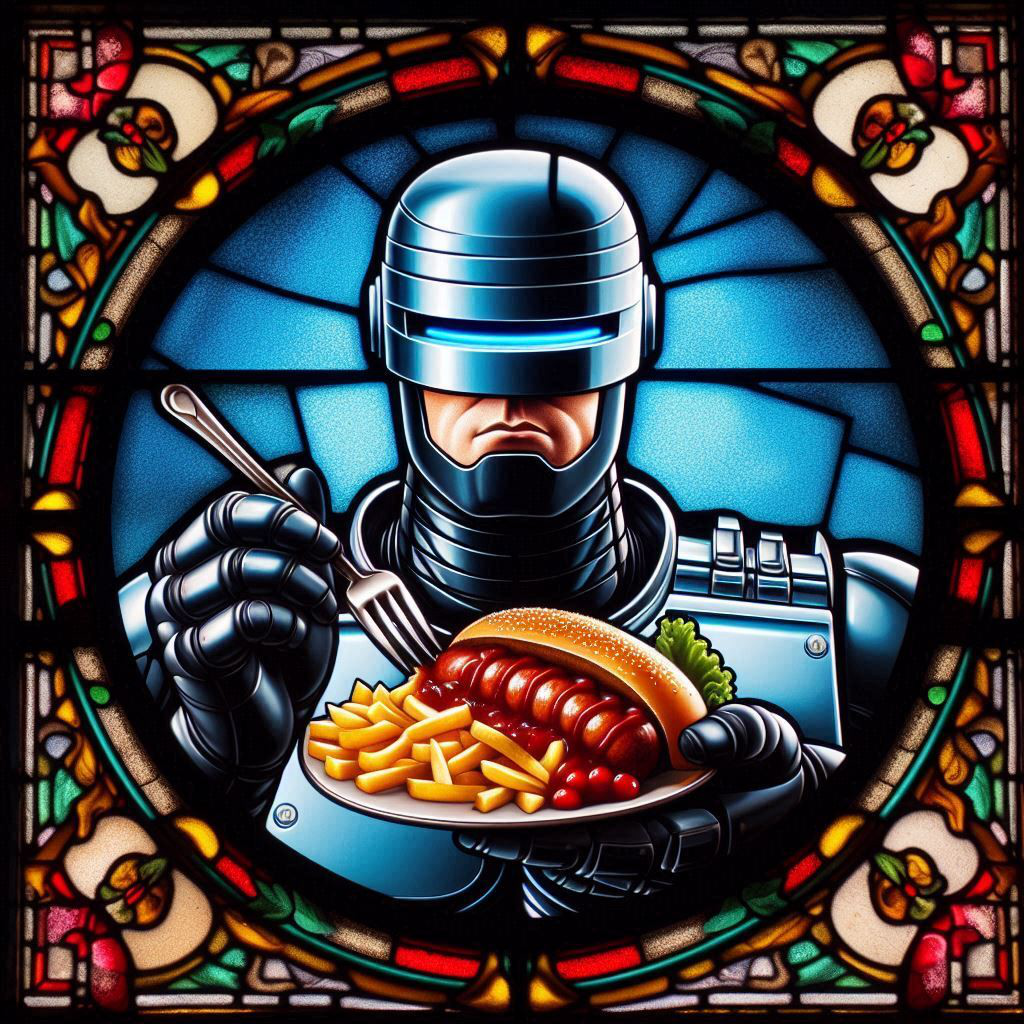

In [71]:
show_image_from_file_id(files.file_id.iloc[-1])